## **Qmio Error Analysis.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qmioanalyzer import read_data, ErrorAnalyzer, ErrorVisualizer
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams["figure.figsize"] = [8.0, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = "serif"

In [2]:
output_graphs = False

### **1. $T_1$ measurements**

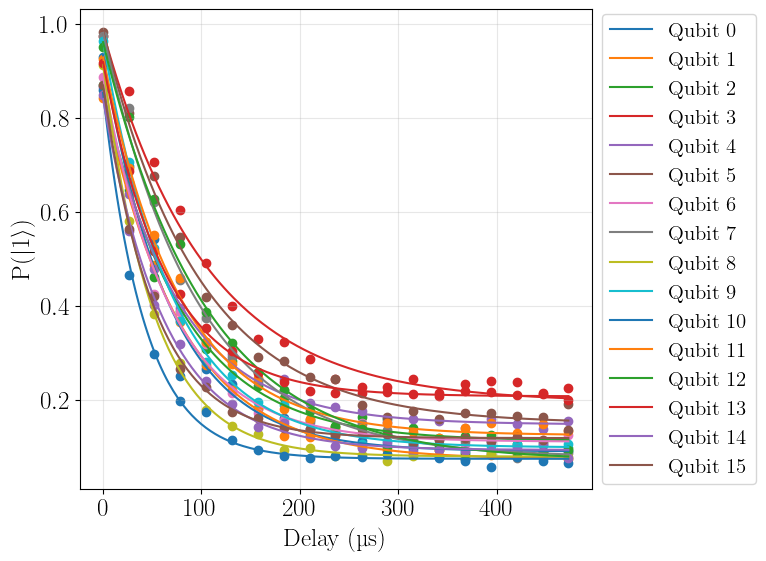

Qubit 0: T1 = 67.78 ± 1.77 µs
           χ² = 108.63, dof = 16, χ²_reduced = 6.79
Qubit 1: T1 = 78.48 ± 2.27 µs
           χ² = 15.20, dof = 16, χ²_reduced = 0.95
Qubit 2: T1 = 80.57 ± 2.56 µs
           χ² = 31.26, dof = 16, χ²_reduced = 1.95
Qubit 3: T1 = 104.77 ± 3.23 µs
           χ² = 69.85, dof = 16, χ²_reduced = 4.37
Qubit 4: T1 = 76.71 ± 2.68 µs
           χ² = 18.24, dof = 16, χ²_reduced = 1.14
Qubit 5: T1 = 98.15 ± 2.71 µs
           χ² = 36.73, dof = 16, χ²_reduced = 2.30
Qubit 6: T1 = 68.86 ± 2.09 µs
           χ² = 34.62, dof = 16, χ²_reduced = 2.16
Qubit 7: T1 = 95.63 ± 2.24 µs
           χ² = 50.40, dof = 16, χ²_reduced = 3.15
Qubit 8: T1 = 51.52 ± 1.44 µs
           χ² = 12.54, dof = 16, χ²_reduced = 0.78
Qubit 9: T1 = 71.39 ± 1.82 µs
           χ² = 17.10, dof = 16, χ²_reduced = 1.07
Qubit 10: T1 = 42.38 ± 1.35 µs
           χ² = 27.42, dof = 16, χ²_reduced = 1.71
Qubit 11: T1 = 77.72 ± 2.27 µs
           χ² = 30.52, dof = 16, χ²_reduced = 1.91
Qubit 12: T1 = 104.12 ± 

In [3]:
# load results
data = pd.read_csv("data/t1_qmio_results_16_qubits.csv")

# define the exponential model
def exp_decay(t, A, T1, B):
    return A * np.exp(-t / T1) + B

# store results with uncertainties
t1_values = {}

plt.figure(figsize=(8,6))

n_shots = 1000

for qubit in data["qubit"].unique():
    qubit_data = data[data["qubit"] == qubit]
    t = qubit_data["delay_us"].values
    p1 = qubit_data["p1"].values
    
    # uncertainties from binomial statistics
    sigma = np.sqrt(p1 * (1 - p1) / n_shots)
    sigma[sigma == 0] = 1 / n_shots  # avoid division by zero
    
    popt, pcov = curve_fit(
        exp_decay, t, p1, p0=[1.0, 100.0, 0.0],
        sigma=sigma, absolute_sigma=True
    )
    perr = np.sqrt(np.diag(pcov))
    
    A, T1, B = popt
    dA, dT1, dB = perr
    
    residuals = p1 - exp_decay(t, *popt)
    chi2 = np.sum((residuals / sigma)**2)
    dof = len(p1) - len(popt)
    chi2_red = chi2 / dof if dof > 0 else np.nan
    
    t1_values[qubit] = (T1, dT1, chi2, dof, chi2_red)
    
    # plot fit
    t_fit = np.linspace(min(t), max(t), 200)
    plt.scatter(t, p1)
    plt.plot(t_fit, exp_decay(t_fit, *popt), label=f"Qubit {qubit}")

plt.xlabel("Delay (µs)")
plt.ylabel(r"P($|1\rangle$)")
plt.grid(alpha=0.3)

# put legend outside, right side
plt.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize="small"  # or a number like 8
)

plt.tight_layout()  # avoids cutting off labels/legend

if output_graphs:   
    plt.savefig("T1_fits.pdf", format='pdf', bbox_inches="tight")

plt.show()

for q, (T1, dT1, chi2, dof, chi2_red) in t1_values.items():
    print(f"Qubit {q}: T1 = {T1:.2f} ± {dT1:.2f} µs")
    print(f"           χ² = {chi2:.2f}, dof = {dof}, χ²_reduced = {chi2_red:.2f}")



### **2. $T_2^*$ measurements**

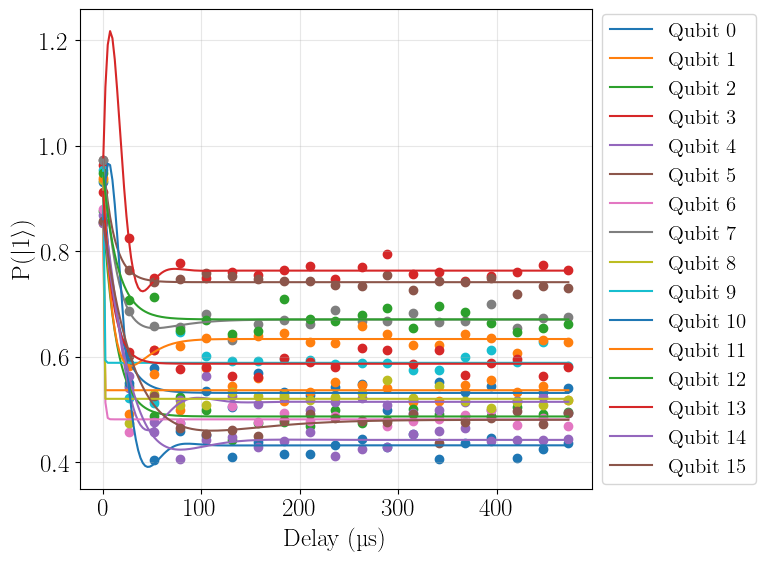

Qubit 0: T2* = 14.31 ± 397007.90 µs
           χ² = 39.19, dof = 14, χ²_reduced = 2.80
Qubit 1: T2* = 0.02 ± 0.00 µs
           χ² = 38.21, dof = 14, χ²_reduced = 2.73
Qubit 2: T2* = 13.53 ± 203288.05 µs
           χ² = 20.42, dof = 14, χ²_reduced = 1.46
Qubit 3: T2* = 13.38 ± 20.16 µs
           χ² = 14.31, dof = 14, χ²_reduced = 1.02
Qubit 4: T2* = 26.12 ± 4.69 µs
           χ² = 16.25, dof = 14, χ²_reduced = 1.16
Qubit 5: T2* = 11.31 ± 86857.14 µs
           χ² = 9.28, dof = 14, χ²_reduced = 0.66
Qubit 6: T2* = 0.94 ± 0.00 µs
           χ² = 18.38, dof = 14, χ²_reduced = 1.31
Qubit 7: T2* = 21.21 ± 5.15 µs
           χ² = 16.06, dof = 14, χ²_reduced = 1.15
Qubit 8: T2* = 0.06 ± 0.00 µs
           χ² = 21.69, dof = 14, χ²_reduced = 1.55
Qubit 9: T2* = 0.54 ± 0.00 µs
           χ² = 71.71, dof = 14, χ²_reduced = 5.12
Qubit 10: T2* = 15.59 ± 9.11 µs
           χ² = 17.60, dof = 14, χ²_reduced = 1.26
Qubit 11: T2* = 15.09 ± 11.96 µs
           χ² = 9.28, dof = 14, χ²_reduced = 0.66
Qubi

In [4]:
data = pd.read_csv("data/t2_qmio_results_16_qubits.csv")

# --- Define exponential decay function for Ramsey (centered at 0.5) ---
def ramsey_osc(t, A, B, T2, Delta, phi):
    return A + B * np.sin(2*np.pi*Delta*t + phi) * np.exp(-t/T2)


# Dictionary to store T2* for each qubit (with errors)
n_shots = 1024  

t2_values = {}

plt.figure(figsize=(8,6))

for qubit in data["qubit"].unique():
    qubit_data = data[data["qubit"] == qubit]
    t = qubit_data["delay_us"].values
    p1 = qubit_data["p1"].values
    
    # binomial standard deviation
    sigma = np.sqrt(p1 * (1 - p1) / n_shots)
    sigma[sigma == 0] = 1 / n_shots   # avoid zero errors
    
    Delta_guess = 1 / (2 * (max(t) - min(t)))  # very rough frequency guess
    p0 = [0.5, 0.5, 200, Delta_guess, 0]

    popt, pcov = curve_fit(
        ramsey_osc, t, p1, p0=p0,
        bounds=([0, 0, 0, 0, -np.pi], [1, 1, np.inf, 0.1, np.pi]),
        sigma=sigma, absolute_sigma=True, maxfev=20000
    )
    perr = np.sqrt(np.diag(pcov))
    
    A, B, T2, Delta, phi = popt
    dA, dB, dT2, dDelta, dphi = perr
    
    # compute χ²
    residuals = p1 - ramsey_osc(t, *popt)
    chi2 = np.sum((residuals / sigma)**2)
    dof = len(p1) - len(popt)
    chi2_red = chi2 / dof if dof > 0 else np.nan
    
    t2_values[qubit] = (T2, dT2, chi2, dof, chi2_red)
    
    # smooth fit line
    t_fit = np.linspace(min(t), max(t), 200)
    plt.scatter(t, p1)
    plt.plot(t_fit, ramsey_osc(t_fit, *popt), label=f"Qubit {qubit}")

plt.xlabel("Delay (µs)")
plt.ylabel(r"P($|1\rangle$)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()

if output_graphs:  
    plt.savefig("T2star_fits.pdf", format='pdf', bbox_inches="tight")
plt.show()

# print extracted T2* values with uncertainties and χ²
for q, (T2, dT2, chi2, dof, chi2_red) in t2_values.items():
    print(f"Qubit {q}: T2* = {T2:.2f} ± {dT2:.2f} µs")
    print(f"           χ² = {chi2:.2f}, dof = {dof}, χ²_reduced = {chi2_red:.2f}")

In [5]:
color_true_dark = "#CC220E"
color_true = "#DB331F"
color_true_light = "#FA9696"
color_true_light_dark = "#E37474"
color_anti_true = "#10CEE3"

color_false_dark = "#0F6FB8"
color_false = "#1F86DB"
color_false_light = "#72BAF7"
color_false_light_dark = "#599DD9"
color_anti_false = "#FF940D"


color_both_dark = "#611299"
color_both = "#8F40C7"
color_both_light = "#C397E8"
color_both_light_dark = "#9F79BD"
color_anti_both = "#16AB55"

color_0 = "#2e1e3b"


color_1 = "#413d7b"
color_1_light = "#7873BA"
color_1_light_dark = "#5A54AB"

color_2 = "#37659e"

color_3 = "#338fa7"
color_3_light = "#82C7D9"
color_3_light_dark = "#5FB8CE"


color_4 = "#41b7ad"

color_5 = "#8bdab2"
color_5_light = "#C9EEDB"
color_5_light_dark = "#A6E3C3"

color_magma_0 = "#221250"
color_magma_1 = "#5f177f"
color_magma_2 = "#982d80"
color_magma_3 = "#d3436e"
color_magma_4 = "#f8765c"
color_magma_5 = "#febb81"

## **Low period circuit.**

### **3. Error distributions.**

In [6]:
bits, rep, init, backend, extra = read_data("data/results_cosmic_low_period_16_qubits_2.txt")

In [7]:
print("Bitstrings:", bits[:5])     # first 5 measured states
print("Repetition period:", rep)
print("Init state:", init)
print("Backend:", backend)
print("Batch IDs:", extra.get("batch"))
print("Shot IDs:", extra.get("shot"))
print("Abs times:", extra.get("abstime"))


Bitstrings: ['1111111111111100' '0011000010101011' '1010111011111101'
 '0101100010101110' '1011101001111001']
Repetition period: 1.8e-05
Init state: None
Backend: qmio
Batch IDs: [  1   1   1 ... 680 680 680]
Shot IDs: [      1       2       3 ... 5570558 5570559 5570560]
Abs times: [   1.8237      1.8237      1.8237   ... 1200.186704 1200.186704
 1200.186704]


In [8]:
errors_obj = ErrorAnalyzer(repetition_period = rep, init_state = init, measurements = bits, verbose=2)
errors_dict = errors_obj.get_errors()

The analysis was performed using the *low repetition period* approach 
(repetition_period < 5e-10 μs). The error dictionary contains:

- Key: 'low_period_errors' → A dictionary with 5570559 measurements with the following subkeys:
  - 'true_errors': Array with the number of true errors (0 expected, 1 measured) for each measurement.
  - 'false_errors': Array with the number of false errors (1 expected, 0 measured) for each measurement.
  - 'total_errors': Array with the total number of errors for each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).




In [9]:
states = errors_dict["low_period_errors"]["states"]
expected = errors_dict["low_period_errors"]["expected"]
true_errors = errors_dict['low_period_errors']['true_errors']
false_errors = errors_dict['low_period_errors']['false_errors']
total_errors = errors_dict['low_period_errors']['total_errors']
times = errors_dict['low_period_errors']['times']


print('number of true errors:',sum(true_errors))
print('number of false errors:',sum(false_errors))
print('number of total errors:',sum(total_errors))


number of true errors: 38032429
number of false errors: 5921158
number of total errors: 43953587


In [10]:
print(times[:5], times[-5:])
print(extra.get("abstime")[1:5], extra.get("abstime")[-5:])

[0.0, 1.8e-05, 3.6e-05, 5.4e-05, 7.2e-05] [100.269972, 100.26999, 100.270008, 100.270026, 100.270044]
[1.8237 1.8237 1.8237 1.8237] [1200.186704 1200.186704 1200.186704 1200.186704 1200.186704]


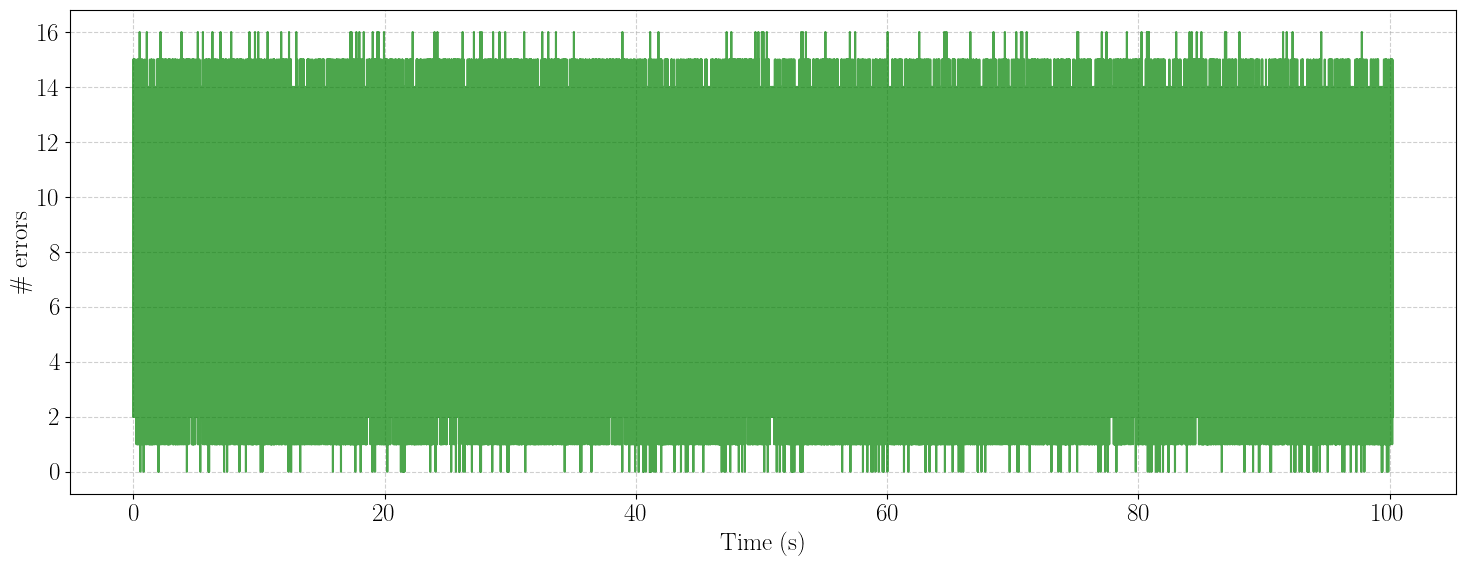

In [11]:
plt.figure(figsize=(15,6))
plt.plot(times, total_errors, '-', color = 'green', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

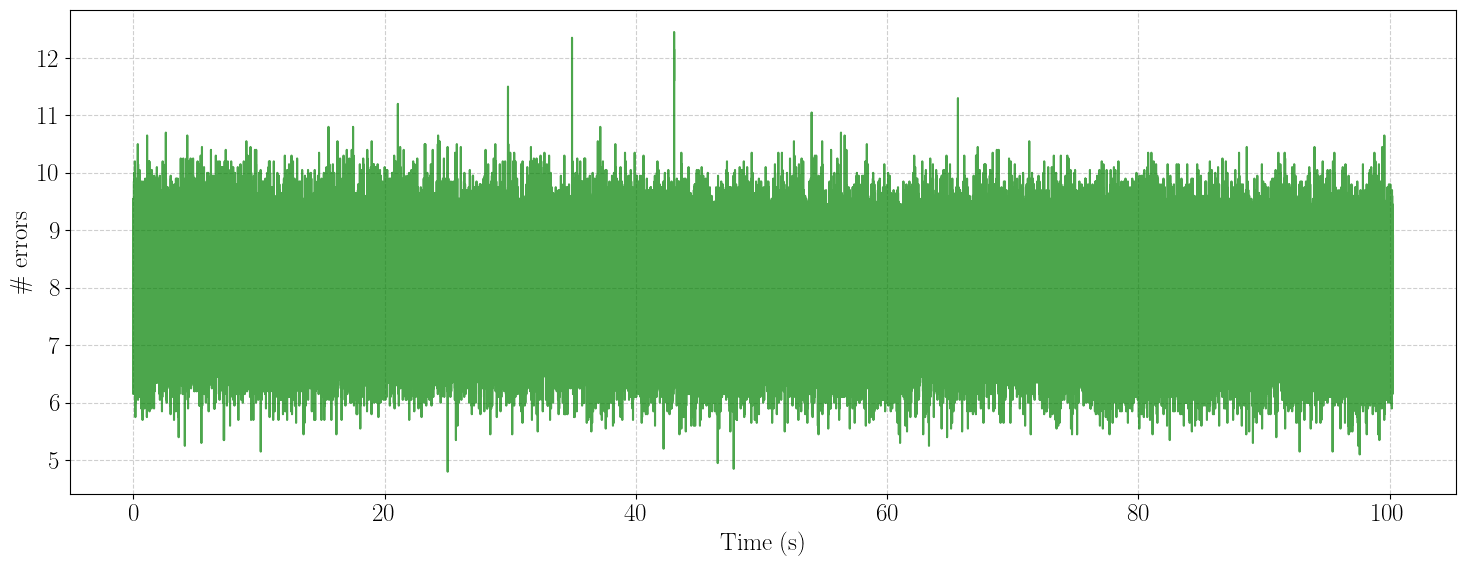

In [12]:
# Example: group every 6 points
bin_size = 20

# convert to arrays
times = np.array(times)
total_errors = np.array(total_errors)

# number of full bins
n_bins = len(total_errors) // bin_size

# reshape and take mean
binned_times = times[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)
binned_errors = total_errors[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)

# plot
plt.figure(figsize=(15,6))
plt.plot(binned_times, binned_errors, '-', color='green', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

mean number of errors: 7.890337561529043


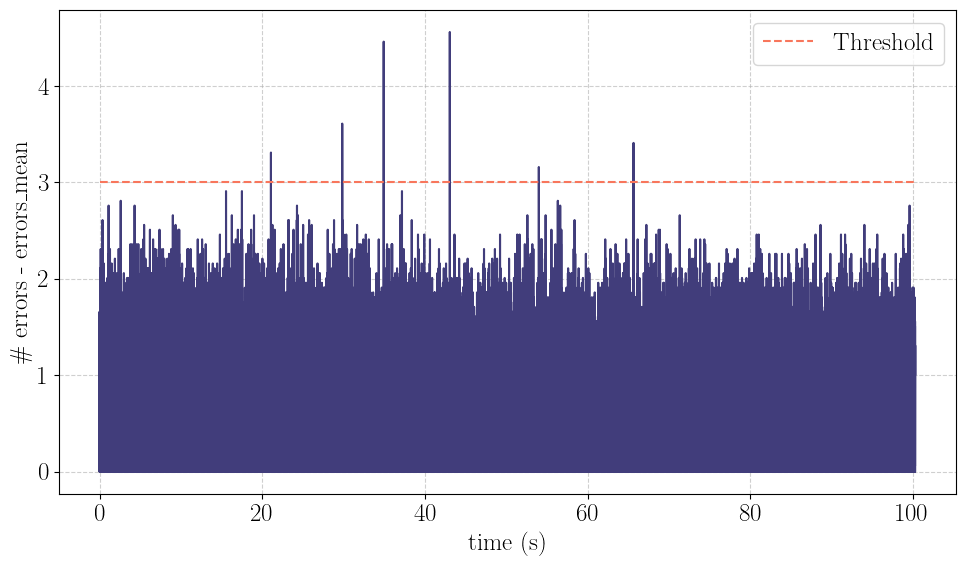

In [13]:
# assume binned_times, binned_errors from previous step
# ---------------- BASELINE ----------------
baseline = np.mean(binned_errors)  # or np.median(binned_errors)
signal = binned_errors - baseline  # subtract baseline
print('mean number of errors:', baseline)

# optionally clip negatives to zero (if you only care about positive peaks)
signal = np.clip(signal, 0, None)
threshold = 3  # 3-sigma threshold

# ---------------- PLOT ----------------
plt.figure(figsize=(10,6))
plt.plot(binned_times, signal, '-', color=color_1,)
plt.hlines(threshold, xmin=binned_times[0], xmax=binned_times[-1], color=color_magma_4, linestyle='--', label='Threshold')
plt.xlabel("time (s)")
plt.ylabel(r"\# errors - errors\_mean")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
if output_graphs:  
    plt.savefig("error_times_low.pdf", format='pdf')
plt.show()

In [14]:
# ---------------- PARAMETERS ----------------
threshold = 3
window_before = 0.001  # seconds
window_after  = 0.003  # seconds

# ---------------- FIND PEAKS ON BINNED SIGNAL ----------------
peak_indices = np.where(signal > threshold)[0]

# avoid duplicates if consecutive bins are above threshold
selected_peaks = []
for idx in peak_indices:
    if not selected_peaks or (idx - selected_peaks[-1]) > 1:
        selected_peaks.append(idx)

print(f"Found {len(selected_peaks)} candidate peaks")

peaks_t = []

# ---------------- EXTRACT FROM RAW DATA ----------------
for peak_idx in selected_peaks:
    t_peak = binned_times[peak_idx]
    print(f"Peak at t = {t_peak:.3f} s")
    peaks_t.append(t_peak)
    
    # define window in raw times
    t_min = t_peak - window_before
    t_max = t_peak + window_after
    
    # mask on raw data
    mask = (times >= t_min) & (times <= t_max)
    
    #plot raw errors around peak
    # plt.figure(figsize=(10,4))
    # plt.plot(times[mask], total_errors[mask], 'o-', color='purple')
    # plt.axhline(np.mean(total_errors), color='gray', linestyle='--', alpha=0.7, label="mean noise")
    # plt.axvline(t_peak, color='black', linestyle=':', label="peak")
    # plt.xlabel("Time (s)")
    # plt.ylabel(r"\# errors (raw)")
    # plt.title(f"Raw errors around peak at t = {t_peak:.3f} s")
    # plt.legend()
    # plt.grid(True, linestyle='--', alpha=0.6)
    # plt.show()


Found 9 candidate peaks
Peak at t = 21.062 s
Peak at t = 29.827 s
Peak at t = 29.827 s
Peak at t = 34.923 s
Peak at t = 34.924 s
Peak at t = 43.050 s
Peak at t = 43.050 s
Peak at t = 53.995 s
Peak at t = 65.640 s


In [15]:
print(peaks_t)

[np.float64(21.061970999999996), np.float64(29.826531), np.float64(29.827251), np.float64(34.923411), np.float64(34.924131), np.float64(43.049691), np.float64(43.050411000000004), np.float64(53.995491), np.float64(65.640051)]


True errors: If a 0 measurement is expected and instead we measure a 1.
False errors:  If a 1 measurement is expected and instead we measure a 0.
Number of true errors: 38032429
Number of false errors 5921158


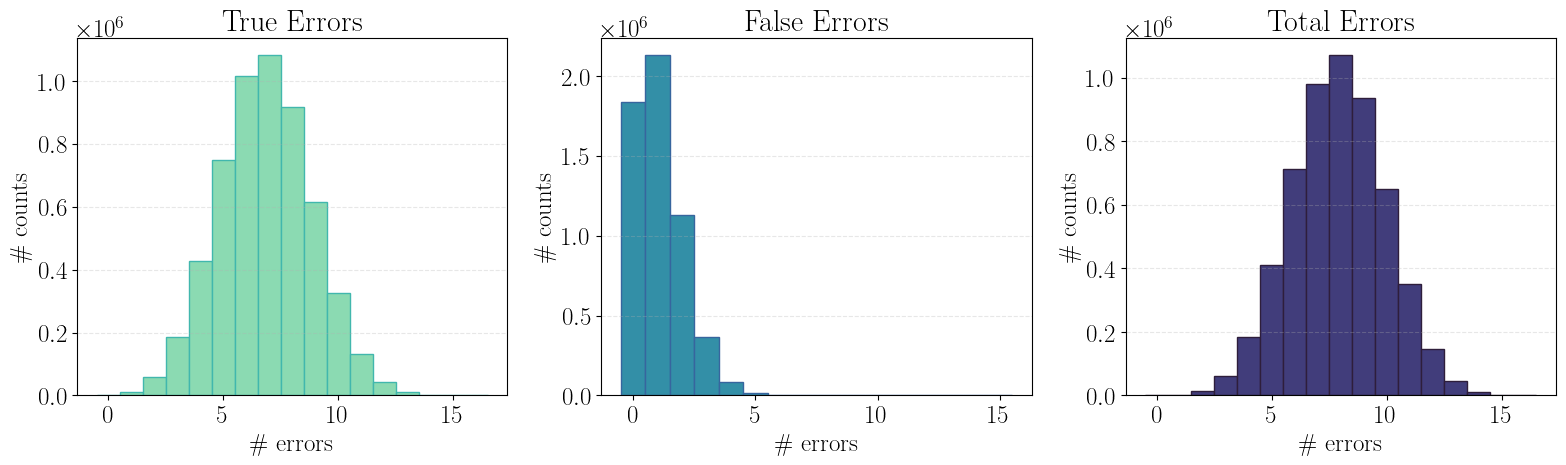

In [16]:
print("True errors: If a 0 measurement is expected and instead we measure a 1.")
print("False errors:  If a 1 measurement is expected and instead we measure a 0.")

print('Number of true errors:',sum(true_errors))
print('Number of false errors', sum(false_errors))

plt.figure(figsize=(16, 5))

    # Histograma de True Errors
plt.subplot(1, 3, 1)
plt.hist(true_errors, bins=range(max(true_errors)+2), edgecolor=color_4, align='left', color=color_5)
plt.title("True Errors")
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Histograma de False Errors
plt.subplot(1, 3, 2)
plt.hist(false_errors, bins=range(max(false_errors)+2), edgecolor=color_2, align='left', color=color_3)
plt.title("False Errors")
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")

plt.grid(axis='y', linestyle='--', alpha=0.3)


plt.subplot(1,3,3)
plt.hist(total_errors, bins=range(min(total_errors), max(total_errors) + 2), color=color_1,align='left', edgecolor=color_0)
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.title("Total Errors")
#plt.xticks(range(min(total_errors), max(total_errors) + 1))  # Asegurar que los ticks sean enteros
#plt.show()
plt.tight_layout()
if output_graphs:  
    plt.savefig("error_histograms_low.pdf", format='pdf')
plt.show()

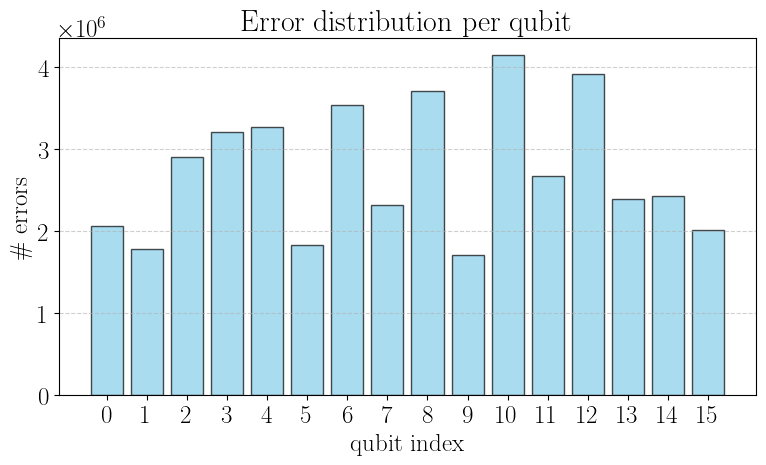

In [17]:
errors_per_qubit = errors_dict["low_period_errors"]["errors_per_qubit"]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(range(len(errors_per_qubit)), errors_per_qubit, color='skyblue', alpha=0.7, edgecolor='black')

# Etiquetas
plt.xlabel("qubit index")
plt.ylabel(r"\# errors")
plt.title("Error distribution per qubit")
plt.xticks(range(len(errors_per_qubit)))  # Marcamos los qubits en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## **Possible cosmic ray impact ?**

In [18]:
# center index

times = [np.float64(15.540291), np.float64(17.496530999999997), np.float64(21.061970999999996), np.float64(29.826531), np.float64(29.827251), np.float64(34.923411), np.float64(34.924131), np.float64(37.172331), np.float64(43.049691), np.float64(43.050411000000004), np.float64(53.995491), np.float64(65.640051)]
index = 0
t_center = times[index]

errors_obj_sel = ErrorAnalyzer(repetition_period = rep, init_state = init, measurements = bits, verbose=0, 
                               center_time=t_center, window=(-0.002, 0.002))
error_vis_sel = ErrorVisualizer(errors_obj_sel)

In [19]:
errors_dict_sel = errors_obj_sel.get_errors()

states_sel = errors_dict_sel["low_period_errors"]["states"]
total_errors_sel = np.array(errors_dict_sel['low_period_errors']['total_errors'])
times_sel = errors_dict_sel['low_period_errors']['times']

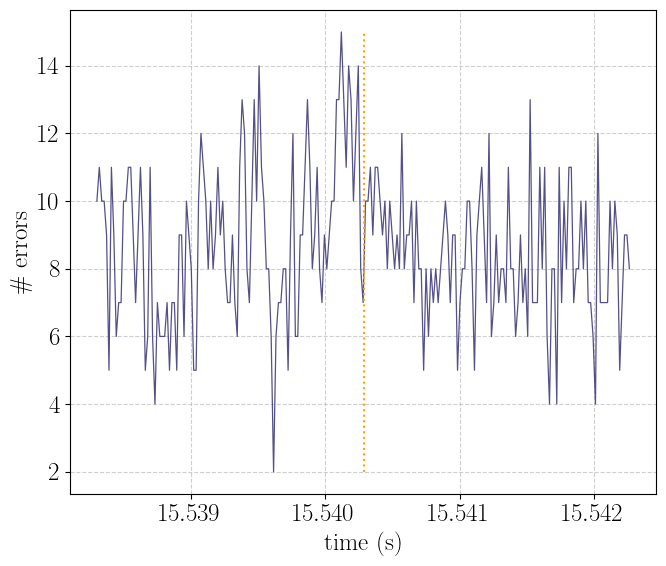

In [20]:
plt.figure(figsize=(7,6))

plt.plot(times_sel, total_errors_sel, '-', color = color_1, linewidth=0.9, alpha=0.9)

plt.xlabel("time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.vlines(t_center, ymin = total_errors_sel.min(), ymax=total_errors_sel.max(), color='orange', linestyle=':', label="peak")
plt.tight_layout()
#plt.savefig("cr_low_"+str(index)+".pdf", format='pdf')
plt.show()

In [21]:
total_errors_sel, true_errors_sel, false_errors_sel = error_vis_sel.get_error_counts(period='low')

True errors: If a 0 measurement is expected and instead we measure a 1.
False errors:  If a 1 measurement is expected and instead we measure a 0.
Number of true errors: 1671
Number of false errors 231


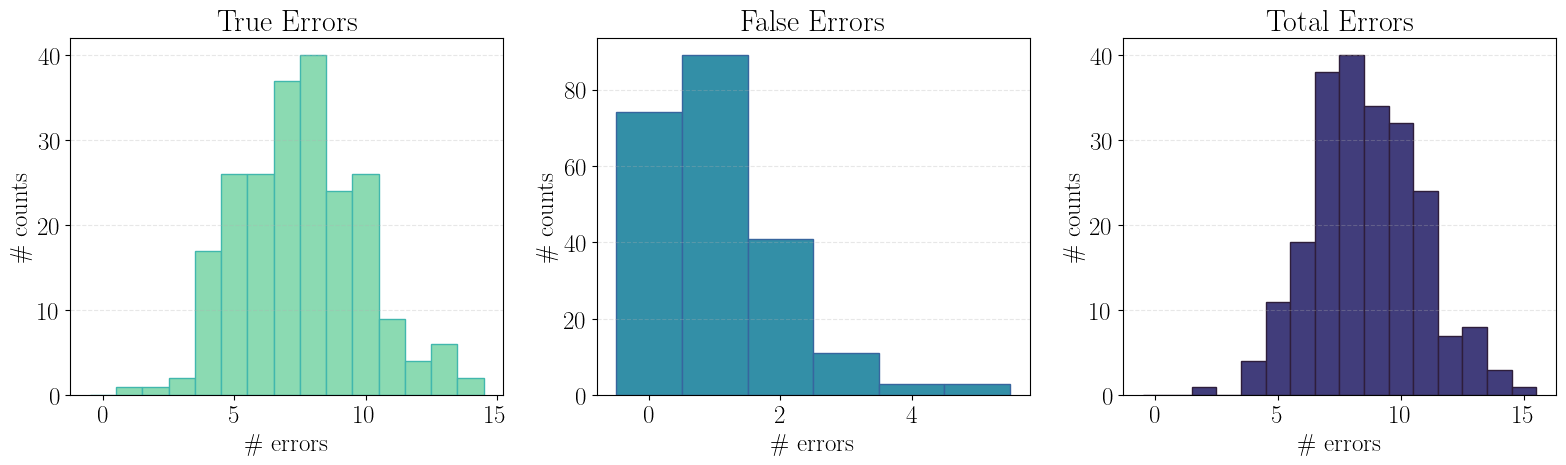

In [22]:
print("True errors: If a 0 measurement is expected and instead we measure a 1.")
print("False errors:  If a 1 measurement is expected and instead we measure a 0.")

print('Number of true errors:',sum(true_errors_sel))
print('Number of false errors', sum(false_errors_sel))


plt.figure(figsize=(16, 5))

    # Histograma de True Errors
plt.subplot(1, 3, 1)
plt.hist(true_errors_sel, bins=range(max(true_errors_sel)+2), edgecolor=color_4, align='left', color=color_5)
plt.title("True Errors")
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Histograma de False Errors
plt.subplot(1, 3, 2)
plt.hist(false_errors_sel, bins=range(max(false_errors_sel)+2), edgecolor=color_2, align='left', color=color_3)
plt.title("False Errors")
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.3)


plt.subplot(1,3,3)
plt.hist(total_errors_sel, bins=range(max(total_errors_sel) + 2), color=color_1, align='left', edgecolor=color_0)
plt.title("Total Errors")
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.3)
#plt.xticks(range(min(total_errors), max(total_errors) + 1))  # Asegurar que los ticks sean enteros
#plt.show()
plt.tight_layout()
if output_graphs:   
    plt.savefig("error_histograms_low_cr.pdf", format='pdf')
plt.show()


## **High period circuit.**

### **1. Initial state: $\ket{1}$**

In [23]:
bits_high_1, rep_high_1, init, backend_high_1, extra_high_1 = read_data("data/results_cosmic_high_period_1_16_qubits.txt")

In [24]:
print("Bitstrings:", bits_high_1[:5])     # first 5 measured states
print("Repetition period:", rep_high_1)
print("Init state:", init)
print("Backend:", backend_high_1)
print("Batch IDs:", extra_high_1.get("batch"))
print("Shot IDs:", extra_high_1.get("shot"))
print("Abs times:", extra_high_1.get("abstime"))


Bitstrings: ['1111111111111111' '1011110011111110' '1111011111111111'
 '0111111111111111' '1011111111111101']
Repetition period: 0.00015
Init state: None
Backend: qmio
Batch IDs: [ 1  1  1 ... 83 83 83]
Shot IDs: [     1      2      3 ... 679934 679935 679936]
Abs times: [  2.529022   2.529022   2.529022 ... 211.455298 211.455298 211.455298]


In [25]:
errors_obj_high = ErrorAnalyzer(repetition_period = rep_high_1, init_state = 1, measurements = bits_high_1, threshold=0.000120, verbose=2)
errors_dict_high = errors_obj_high.get_errors()

The analysis was performed using the *high repetition period* approach 
(repetition_period ≥ 1.2e-10 μs). The error dictionary contains:

- Key: 'high_period_errors' → Returns two arrays with 679936 measurements:
  - 'error_counts': Array with the number of errors associated with each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).




In [26]:
states_high = errors_dict_high["high_period_errors"]["states"]
total_errors_high = errors_dict_high['high_period_errors']['total_errors']
times_high = errors_dict_high['high_period_errors']['times']

print('number of total errors:',sum(total_errors_high))


number of total errors: 1663545


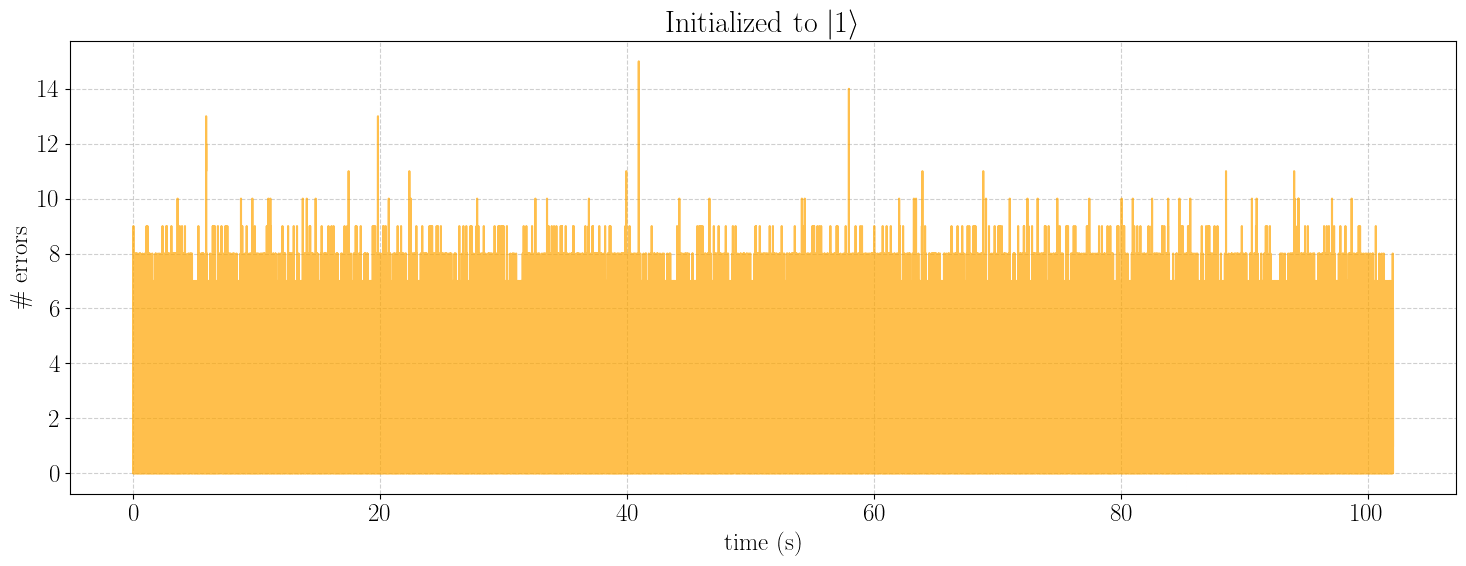

In [27]:
plt.figure(figsize=(15,6))

plt.plot(times_high, total_errors_high, '-', color = 'orange', markersize=3, alpha=0.7)

plt.xlabel("time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title(r'Initialized to $|1\rangle$')

plt.tight_layout()
plt.show()

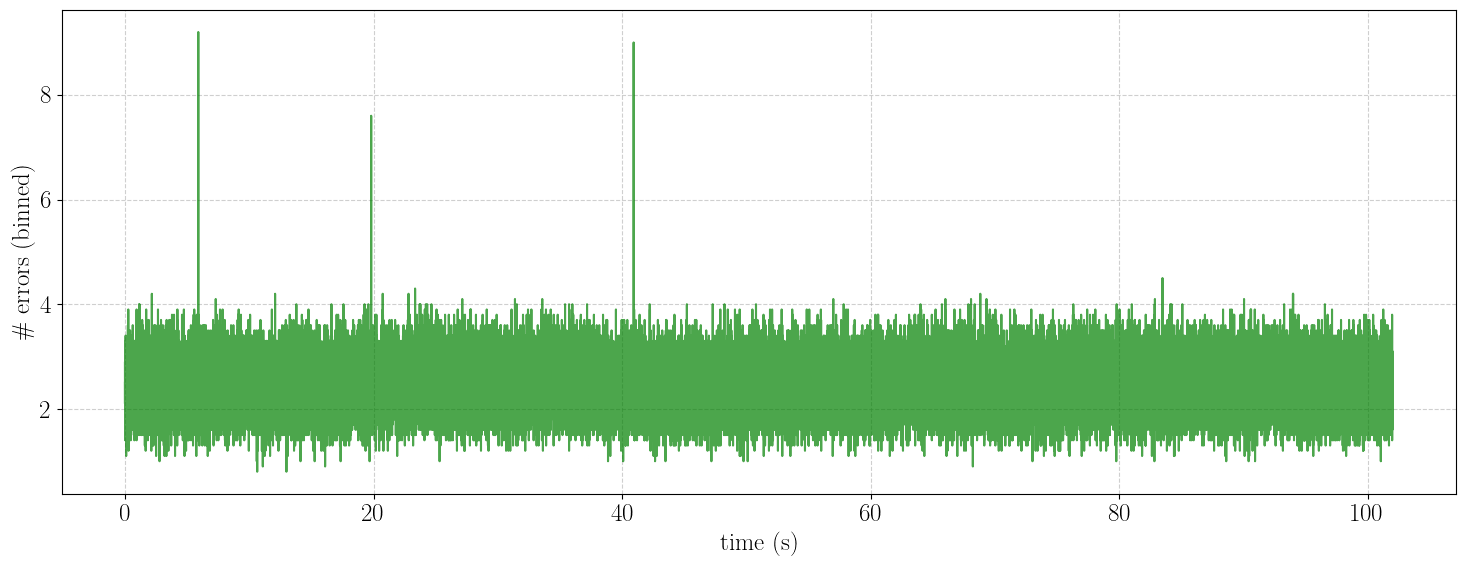

In [28]:
# Example: group every 6 points
bin_size = 10

# convert to arrays
times_high = np.array(times_high)
total_errors_high = np.array(total_errors_high)

# number of full bins
n_bins = len(total_errors_high) // bin_size

# reshape and take mean
binned_times = times_high[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)
binned_errors = total_errors_high[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)

# plot
plt.figure(figsize=(15,6))
plt.plot(binned_times, binned_errors, '-', color='green', alpha=0.7)
plt.xlabel("time (s)")
plt.ylabel(r"\# errors (binned)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

mean number of errors: 2.4466253879075786


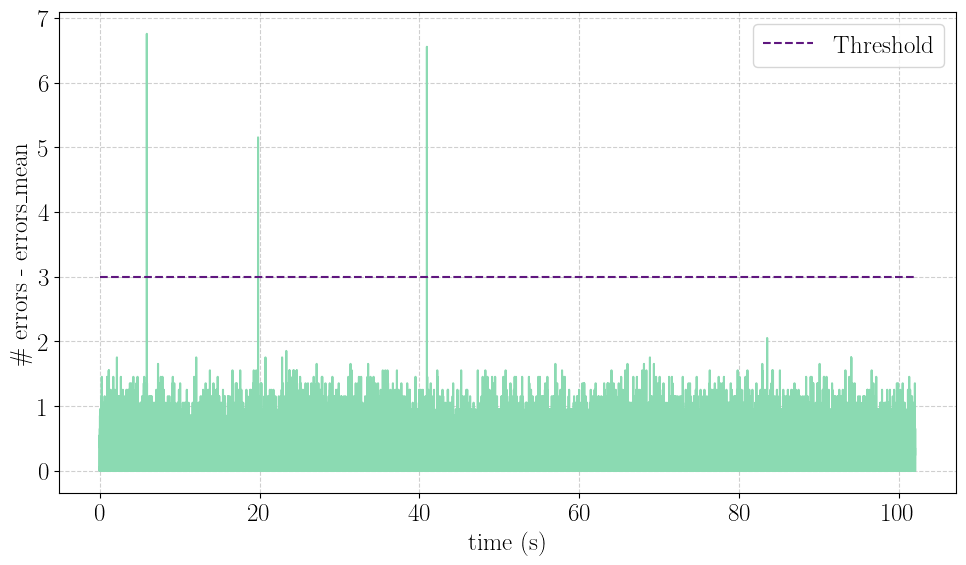

In [29]:
# assume binned_times, binned_errors from previous step
# ---------------- BASELINE ----------------
baseline = np.mean(binned_errors)  # or np.median(binned_errors)
signal = binned_errors - baseline  # subtract baseline
print('mean number of errors:', baseline)

# optionally clip negatives to zero (if you only care about positive peaks)
signal = np.clip(signal, 0, None)
threshold = 3

# ---------------- PLOT ----------------
plt.figure(figsize=(10,6))
plt.plot(binned_times, signal, '-', color=color_5)
plt.xlabel("time (s)")
plt.ylabel(r"\# errors - errors\_mean")
plt.hlines(y=threshold, xmin=binned_times[0], xmax=binned_times[-1], color=color_magma_1, linestyle='--', label='Threshold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("errors_time_high_1.pdf", format='pdf')
plt.show()

In [30]:
# ---------------- PARAMETERS ----------------
threshold = 3
window_before = 0.01  # seconds
window_after  = 0.03  # seconds

# ---------------- FIND PEAKS ON BINNED SIGNAL ----------------
peak_indices = np.where(signal > threshold)[0]

# avoid duplicates if consecutive bins are above threshold
selected_peaks = []
for idx in peak_indices:
    if not selected_peaks or (idx - selected_peaks[-1]) > 1:
        selected_peaks.append(idx)

print(f"Found {len(selected_peaks)} candidate peaks")
peaks_t = []

# ---------------- EXTRACT FROM RAW DATA ----------------
for peak_idx in selected_peaks:
    t_peak = binned_times[peak_idx]
    print(f"Peak at t = {t_peak:.3f} s")
    peaks_t.append(t_peak)
    
    # define window in raw times
    t_min = t_peak - window_before
    t_max = t_peak + window_after
    
    # mask on raw data
    mask = (times_high >= t_min) & (times_high <= t_max)

    #plot raw errors around peak
    # plt.figure(figsize=(10,4))
    # plt.plot(times_high[mask], total_errors_high[mask], 'o-', color='purple')
    # plt.axhline(np.mean(total_errors_high), color='gray', linestyle='--', alpha=0.7, label="mean noise")
    # plt.axvline(t_peak, color='black', linestyle=':', label="peak")
    # plt.xlabel("time (s)")
    # plt.ylabel(r"\# errors (raw)")
    # plt.title(f"Raw errors around peak at t = {t_peak:.3f} s")
    # plt.legend()
    # plt.grid(True, linestyle='--', alpha=0.6)
    # plt.show()

Found 3 candidate peaks
Peak at t = 5.902 s
Peak at t = 19.811 s
Peak at t = 40.927 s


In [31]:
print(peaks_t)

[np.float64(5.901674999999999), np.float64(19.811175), np.float64(40.926674999999996)]


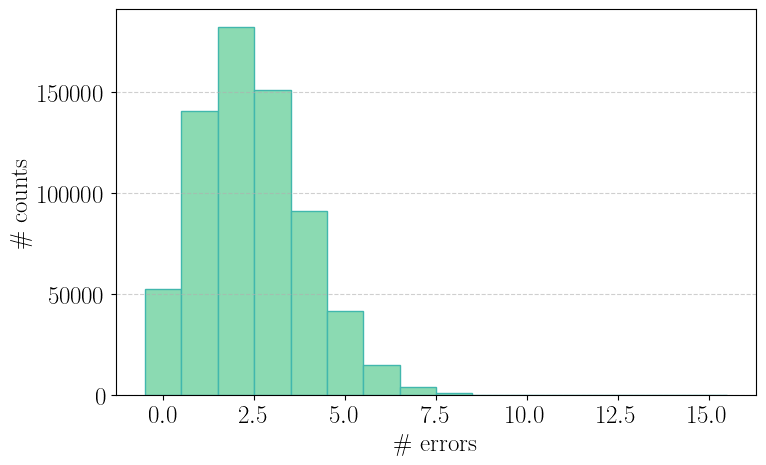

In [32]:
plt.figure(figsize=(8,5))
plt.hist(total_errors_high, bins=range(max(total_errors_high) + 2), align='left', color=color_5, edgecolor=color_4)
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("error_histogram_high_1.pdf", format='pdf')
plt.show()

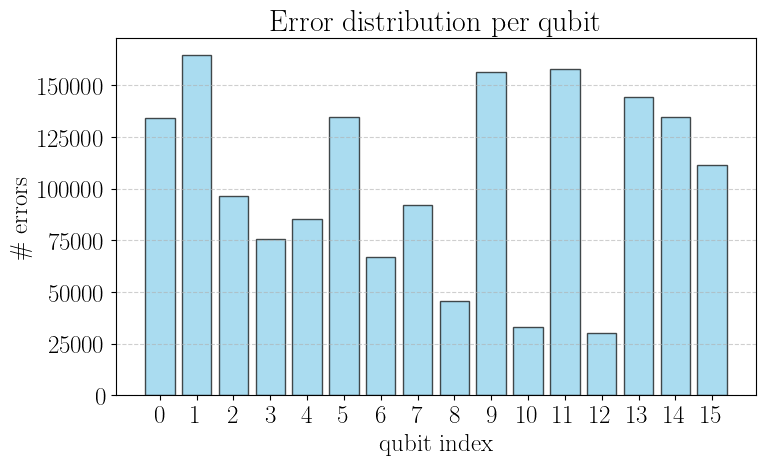

In [33]:
errors_per_qubit = errors_dict_high["high_period_errors"]["errors_per_qubit"]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(range(len(errors_per_qubit)), errors_per_qubit, color='skyblue', alpha=0.7, edgecolor='black')

# Etiquetas
plt.xlabel("qubit index")
plt.ylabel(r"\# errors")
plt.title("Error distribution per qubit")
plt.xticks(range(len(errors_per_qubit)))  # Marcamos los qubits en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### **Posible cosmic ray?**

In [34]:
t_peaks = [np.float64(5.9008), np.float64(19.8105), np.float64(40.9256)]
do_fit = [True, True, True, True, True, True]

In [35]:
# --- Exponential decay model (same as before) ---
def exp_decay_peak(t, A, tau, B, t0):
    return np.where(t >= t0, A * np.exp(-(t - t0) / tau) + B, B)

In [36]:
results_high = {}

window_low = -0.01  # seconds before peak

for idx, t_central in enumerate(t_peaks):

    errors_obj = ErrorAnalyzer(
        repetition_period = rep_high_1,
        init_state = init,
        measurements = bits_high_1,
        verbose=0,
        threshold=0.000120,
        center_time = t_central,
        window = (window_low, 0.015)
    )
    errors_dict = errors_obj.get_errors()

    total_errors = np.array(errors_dict['high_period_errors']['total_errors'])
    times_data = np.array(errors_dict['high_period_errors']['times'])

    # --- If fit is disabled, just plot the raw data ---
    if not do_fit[idx]:
        print(f"Event {idx}: skipped fit, only plotting data.")
        
        plt.figure(figsize=(7,6))
        plt.plot(times_data, total_errors, '-', color=color_5, linewidth=1, alpha=0.9)
        plt.vlines(t_central, ymin=total_errors.min(), ymax=total_errors.max(),
                   color=color_magma_4, linestyles='dashed', linewidth=1.5, label="Impact time")
        plt.xlabel("time (s)")
        plt.ylabel(r"\# errors")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        if output_graphs:
            plt.savefig(f"cr_high_16_{idx}.pdf", format='pdf')
        plt.close()
        continue

    # --- Fit is enabled ---
    mask = (times_data > t_central) & (times_data < t_central + 0.02)
    t_fit_data = times_data[mask]
    y_fit_data = total_errors[mask]

    if len(t_fit_data) < 5:
        print(f"Skipping index {idx}, not enough points in window.")
        continue

    try:
        popt, pcov = curve_fit(
            lambda t, A, tau, B: exp_decay_peak(t, A, tau, B, t_central),
            t_fit_data, y_fit_data,
            p0=[max(y_fit_data), 0.005, min(y_fit_data)],
            maxfev=20000
        )
        A, tau, B = popt
        dA, dtau, dB = np.sqrt(np.diag(pcov))

        # chi-square
        residuals = y_fit_data - exp_decay_peak(t_fit_data, A, tau, B, t_central)
        chi2 = np.sum(residuals**2)
        dof = len(y_fit_data) - len(popt)
        chi2_red = chi2 / dof if dof > 0 else np.nan

        results_high[idx] = (tau, dtau, chi2, dof, chi2_red)

        # --- Plot with fit ---
        plt.figure(figsize=(7,6))
        plt.plot(times_data, total_errors, '-', color=color_5, linewidth=1, alpha=0.9)
        t_fit_line = np.linspace(t_central, t_central + 0.015, 500)
        plt.plot(t_fit_line, exp_decay_peak(t_fit_line, A, tau, B, t_central),
                 color=color_magma_1, linewidth=2, label="Exponential fit")
        plt.vlines(t_central, ymin=total_errors.min(), ymax=total_errors.max()+0.9,
                   color=color_magma_1, linestyles='dashed', linewidth=2, label="Impact time")
        plt.xlabel("time (s)")
        plt.ylabel(r"\# errors")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        if output_graphs:
            plt.savefig(f"cr_high_16_{idx}.pdf", format='pdf')
        plt.close()

        # --- Print results ---
        print(f"Event {idx}: t0 = {t_central:.3f} s")
        print(f"   τ = {tau*1000:.2f} ± {dtau*1000:.2f} ms")
        print(f"   χ² = {chi2:.2f}, dof = {dof}, χ²_red = {chi2_red:.2f}")

    except RuntimeError:
        print(f"Fit did not converge for event {idx}.")

Event 0: t0 = 5.901 s
   τ = 2.11 ± 0.34 ms
   χ² = 298.71, dof = 97, χ²_red = 3.08
Event 1: t0 = 19.811 s
   τ = 2.79 ± 0.72 ms
   χ² = 318.10, dof = 97, χ²_red = 3.28
Event 2: t0 = 40.926 s
   τ = 2.91 ± 0.62 ms
   χ² = 421.16, dof = 97, χ²_red = 4.34


In [37]:
t_peaks = [np.float64(5.901674999999999), np.float64(19.811175), np.float64(40.926674999999996)]

index = 0
t_central=t_peaks[index]

errors_obj_high_1_sel = ErrorAnalyzer(repetition_period = rep_high_1, init_state = init, measurements = bits_high_1, 
                               verbose=0, threshold=0.000120, center_time=t_central, window=(-0.005, 0.015))
error_vis_high_1_sel = ErrorVisualizer(errors_obj_high_1_sel)
# now compute error patterns from this subset

In [38]:
errors_dict_high_1_sel = errors_obj_high_1_sel.get_errors()

states_high_1_sel = errors_dict_high_1_sel["high_period_errors"]["states"]
total_errors_high_1_sel = errors_dict_high_1_sel['high_period_errors']['total_errors']
times_high_1_sel = errors_dict_high_1_sel['high_period_errors']['times']


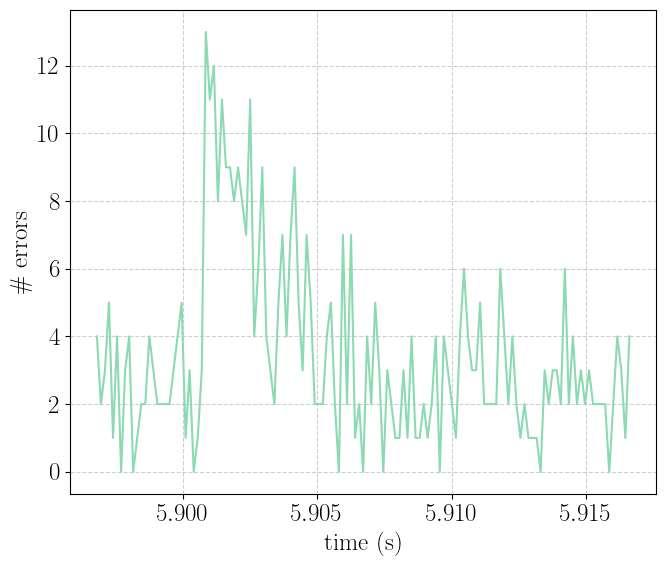

In [39]:
plt.figure(figsize=(7,6))

plt.plot(times_high_1_sel, total_errors_high_1_sel, '-', color = color_5, markersize=3)

plt.xlabel("time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
#plt.title(r'Initialized to |1⟩')
plt.tight_layout()
if output_graphs:  
    plt.savefig("cr_high_"+str(index)+".pdf", format='pdf')
plt.show()

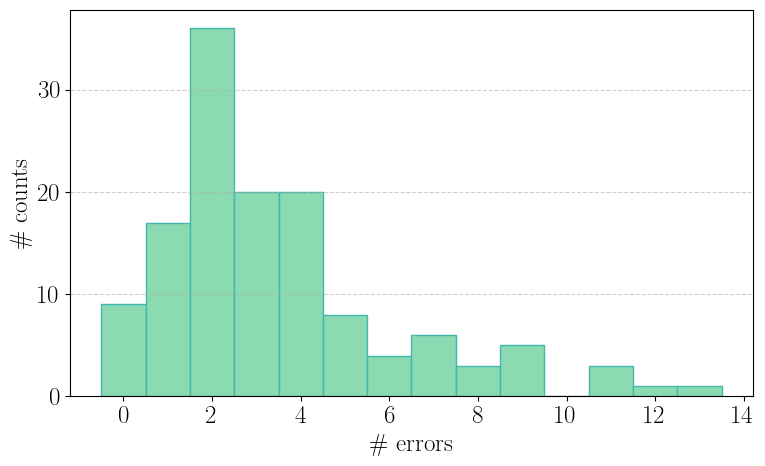

In [40]:
plt.figure(figsize=(8,5))
plt.hist(total_errors_high_1_sel, bins=range(max(total_errors_high_1_sel) + 2), align='left', color=color_5, edgecolor=color_4)
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("error_histogram_high_1_cr.pdf", format='pdf')
plt.show()


### **2. Initial state: $\ket{0}$**

In [41]:
bits_high_0, rep_high_0, init, backend_high_0, extra_high_0 = read_data("data/results_cosmic_high_period_0_16_qubits.txt")

In [42]:
print("Bitstrings:", bits_high_0[:5])     # first 5 measured states
print("Repetition period:", rep_high_0)
print("Init state:", init)
print("Backend:", backend_high_0)
print("Batch IDs:", extra_high_0.get("batch"))
print("Shot IDs:", extra_high_0.get("shot"))
print("Abs times:", extra_high_0.get("abstime"))


Bitstrings: ['0001000000010100' '0000001010010101' '0000000000000001'
 '0000001000001000' '0000000000101001']
Repetition period: 0.00015
Init state: None
Backend: qmio
Batch IDs: [ 1  1  1 ... 83 83 83]
Shot IDs: [     1      2      3 ... 679934 679935 679936]
Abs times: [  2.556158   2.556158   2.556158 ... 201.37432  201.37432  201.37432 ]


In [43]:
errors_obj_high_0 = ErrorAnalyzer(repetition_period = rep_high_0, init_state = 0, 
                                  measurements = bits_high_0, threshold=0.000120, verbose=2)
errors_dict_high_0 = errors_obj_high_0.get_errors()

The analysis was performed using the *high repetition period* approach 
(repetition_period ≥ 1.2e-10 μs). The error dictionary contains:

- Key: 'high_period_errors' → Returns two arrays with 679936 measurements:
  - 'error_counts': Array with the number of errors associated with each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).




In [44]:
states_high_0 = errors_dict_high_0["high_period_errors"]["states"]
total_errors_high_0 = errors_dict_high_0['high_period_errors']['total_errors']
times_high_0 = errors_dict_high_0['high_period_errors']['times']

print('number of total errors:',sum(total_errors_high_0))


number of total errors: 1699540


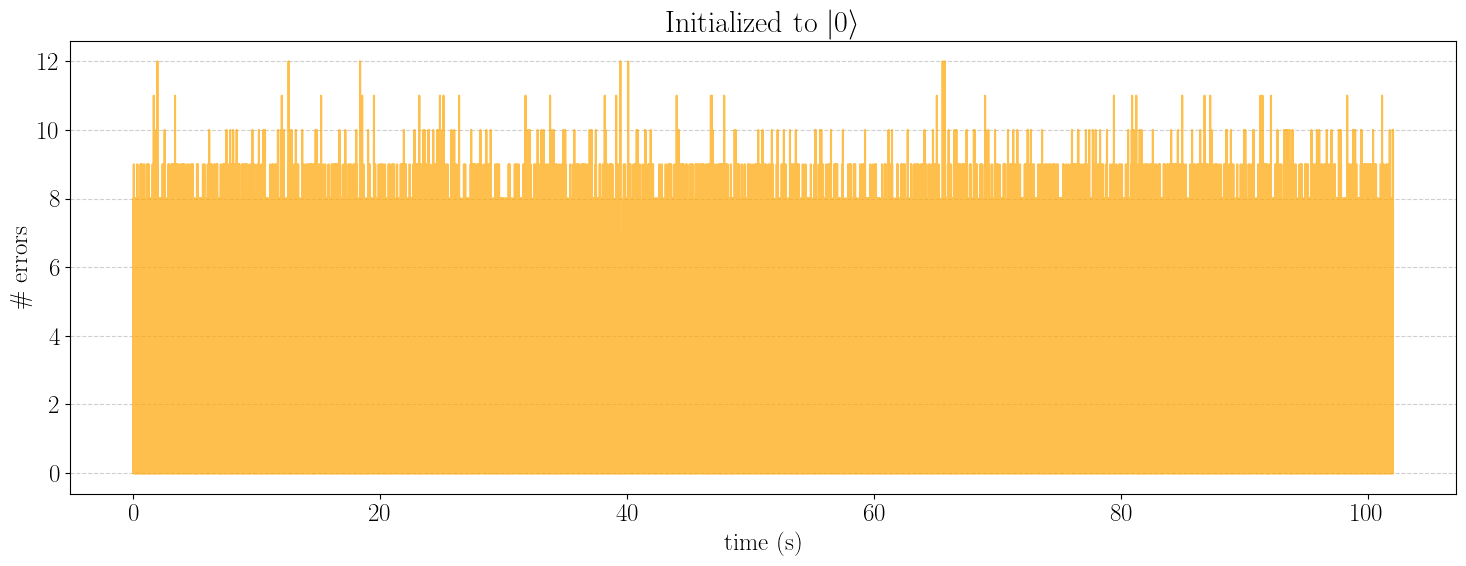

In [45]:
plt.figure(figsize=(15,6))

plt.plot(times_high_0, total_errors_high_0, '-', color = 'orange', markersize=3, alpha=0.7)

plt.xlabel("time (s)")
plt.ylabel(r"\# errors")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title(r'Initialized to $|0\rangle$')

plt.tight_layout()
plt.show()

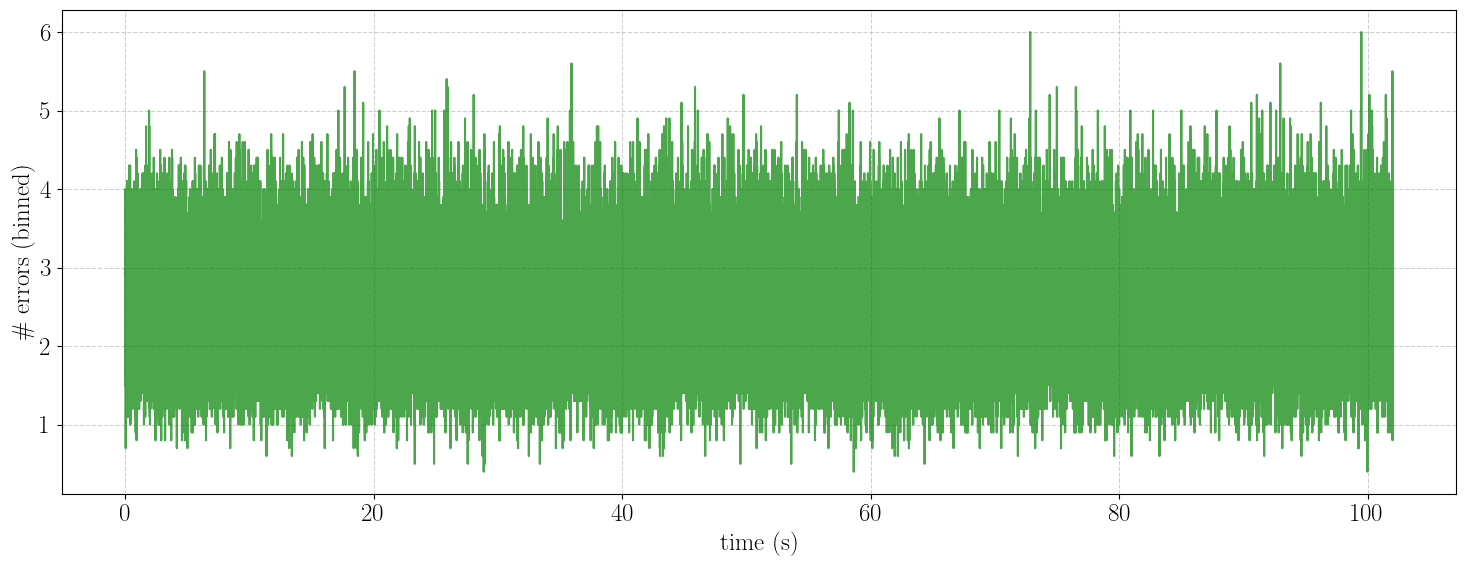

In [46]:
# Example: group every 6 points
bin_size = 10

# convert to arrays
times_high_0 = np.array(times_high_0)
total_errors_high_0 = np.array(total_errors_high_0)

# number of full bins
n_bins = len(total_errors_high_0) // bin_size

# reshape and take mean
binned_times = times_high_0[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)
binned_errors = total_errors_high_0[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)

# plot
plt.figure(figsize=(15,6))
plt.plot(binned_times, binned_errors, '-', color='green', alpha=0.7)
plt.xlabel("time (s)")
plt.ylabel(r"\# errors (binned)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

mean number of errors: 2.499533775535717


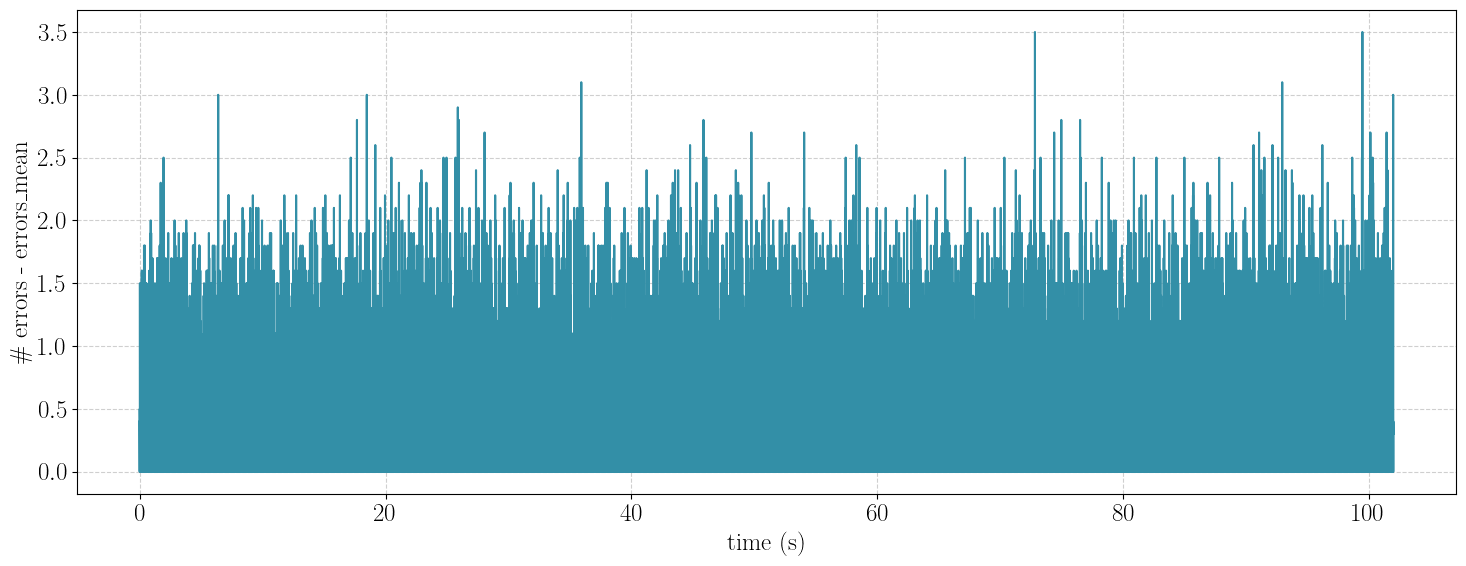

In [47]:
# assume binned_times, binned_errors from previous step
# ---------------- BASELINE ----------------
baseline = np.mean(binned_errors)  # or np.median(binned_errors)
print('mean number of errors:', baseline)
signal = binned_errors - baseline  # subtract baseline

# optionally clip negatives to zero (if you only care about positive peaks)
signal = np.clip(signal, 0, None)

# ---------------- PLOT ----------------
plt.figure(figsize=(15,6))
plt.plot(binned_times, signal, '-', color=color_3)
plt.xlabel("time (s)")
plt.ylabel(r"\# errors - errors\_mean")
plt.grid(True, linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("errors_time_high_0.pdf", format='pdf')
plt.show()

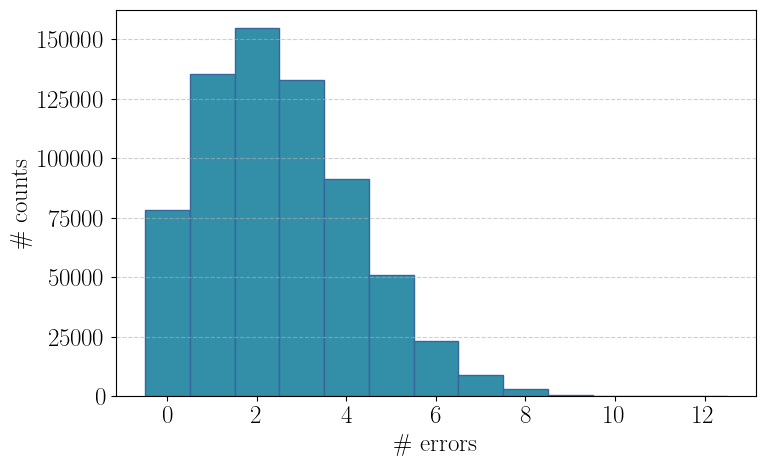

In [48]:
plt.figure(figsize=(8,5))
plt.hist(total_errors_high_0, bins=range(max(total_errors_high_0) + 2), align='left', color=color_3, edgecolor=color_2)
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("error_histogram_high_0.pdf", format='pdf')
plt.show()